In [2]:
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import astropy.constants as const

# Read in and Save Galaxy Template Files

In [1]:
with urllib.request.urlopen('https://cdsarc.cds.unistra.fr/ftp/J/A+A/551/A100/temp1p6/') as f:
    f=f.read().decode('utf-8')

with open('testfile','w') as filename:
    filename.write(f)

NameError: name 'urllib' is not defined

In [ ]:
with open('testfile') as file:
    items = file.readlines()[6:-4]
    files = []
    for i,it in enumerate(items):
        items[i] = it.split(' ')
    for thing in items:
        files.append([k for k in thing if 'norm' in k])
    files = [x.split('"')[1] for xs in files for x in xs]
    print(files)

['Blue_SF_glx.norm_1p6', 'BroadFIR_SF_glx.norm_1p6', 'Cold_glx.norm_1p6', 'Elliptical.norm_1p6', 'Ly_break.norm_1p6', 'MIR_powlaw_SF_glx.norm_1p6', 'MIRex_SF_glx.norm_1p6', 'Mod_SF_glx.norm_1p6', 'Obs_SF_glx.norm_1p6', 'PAH_SF_glx.norm_1p6', 'Red_SF_glx_1.norm_1p6', 'Red_SF_glx_2.norm_1p6', 'SF_Type1_AGN_1.norm_1p6', 'SF_Type1_AGN_2.norm_1p6', 'SF_Type1_AGN_3.norm_1p6', 'SF_Type1_AGN_4.norm_1p6', 'SF_Type2_AGN_1.norm_1p6', 'SF_Type2_AGN_2.norm_1p6', 'SF_Type2_AGN_3.norm_1p6', 'SF_glx_1.norm_1p6', 'SF_glx_2.norm_1p6', 'Secular_glx.norm_1p6', 'Si_break.norm_1p6', 'Spiral.norm_1p6', 'Torus.norm_1p6', 'Type1_AGN_1.norm_1p6', 'Type2_AGN_1.norm_1p6', 'Type2_AGN_2.norm_1p6', 'Warm_SF_glx.norm_1p6', 'WeakPAH_SF_glx_1.norm_1p6', 'WeakPAH_SF_glx_2.norm_1p6', 'Young_SF_glx.norm_1p6']


In [ ]:
for template in files:
    with urllib.request.urlopen('https://cdsarc.cds.unistra.fr/ftp/J/A+A/551/A100/temp1p6/'+template) as t:
        t = t.read().decode('utf-8')
    with open('../data/raw/'+template,'w') as dump:
        dump.write(t)

# Load in newly saved Template files

## Retrieve Files

In [104]:
import matplotlib.colors as mcol
import matplotlib.cm as cm

In [9]:
files = os.listdir('../data/galaxySEDs/')
if '.DS_Store' in files: files.remove('.DS_Store')
files = [x for x in files if 'norm' in x]
print(files)

['WeakPAH_SF_glx_2.norm_1p6', 'SF_Type2_AGN_3.norm_1p6', 'SF_Type2_AGN_2.norm_1p6', 'SF_glx_1.norm_1p6', 'MIR_powlaw_SF_glx.norm_1p6', 'SF_Type1_AGN_4.norm_1p6', 'Type1_AGN_1.norm_1p6', 'Torus.norm_1p6', 'SF_Type1_AGN_2.norm_1p6', 'SF_Type1_AGN_3.norm_1p6', 'Warm_SF_glx.norm_1p6', 'Red_SF_glx_2.norm_1p6', 'Elliptical.norm_1p6', 'PAH_SF_glx.norm_1p6', 'Cold_glx.norm_1p6', 'MIRex_SF_glx.norm_1p6', 'Type2_AGN_1.norm_1p6', 'Young_SF_glx.norm_1p6', 'Si_break.norm_1p6', 'Spiral.norm_1p6', 'Blue_SF_glx.norm_1p6', 'Secular_glx.norm_1p6', 'WeakPAH_SF_glx_1.norm_1p6', 'SF_Type2_AGN_1.norm_1p6', 'SF_glx_2.norm_1p6', 'BroadFIR_SF_glx.norm_1p6', 'Type2_AGN_2.norm_1p6', 'Ly_break.norm_1p6', 'Obs_SF_glx.norm_1p6', 'Red_SF_glx_1.norm_1p6', 'Mod_SF_glx.norm_1p6', 'SF_Type1_AGN_1.norm_1p6']


Text(0, 0.5, '$Flux*\\lambda ^2$')

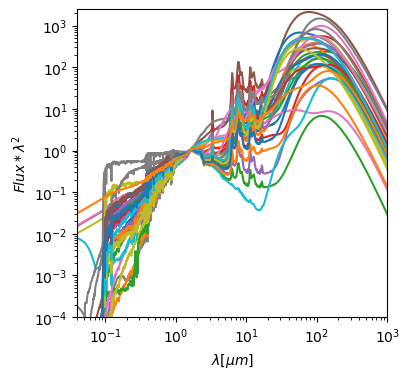

In [13]:
files = os.listdir('../data/galaxySEDs/')
if '.DS_Store' in files: files.remove('.DS_Store')
files = [x for x in files if 'norm' in x]

fig = plt.figure(figsize = (4,4))

for i in range(0,len(files)):
    tab = pd.read_csv('../data/galaxySEDs/'+files[i],header=None,delim_whitespace=True)
    tab[0] = tab[0]/10**4 # Convert wavelengths from Angstroms to um
    tab[1] = tab[1]*((tab[0])**2) # Plot Flux * wave^2
    tab[1] = tab[1]/tab[1][6396]
    #print(tab[1][6396])
    plt.loglog(tab[0],tab[1])
    #plt.axvline(1.6)
plt.ylim(10**-4,2.5*10**3)
plt.xlim(4*10**-2,10**3)
plt.xlabel(r'$\lambda [\mu m]$')
plt.ylabel(r'$Flux*\lambda ^2$')

## Create FITS

In [14]:
from astropy.io import fits
from astropy import table
from astropy import units as u
from astropy import constants as const

In [15]:
for i in range(0,len(files)):
    tab = pd.read_csv('../data/galaxySEDs/'+files[i],header=None,delim_whitespace=True)
    modname = files[i].split('.')[0]
    a1 = np.ones(1)
    primhead = fits.Header([fits.Card('DISTANCE',3E+21,'Distance in cm'),
                        fits.Card('NWAV',len(tab),'Number of wavelengths')])
    primhdu = fits.PrimaryHDU(a1,primhead)

    col1 = fits.Column(name='MODEL_NAME', format='20A', array=[modname]) #Column objects package the arrays with the typical fits info: name and format
    cols = fits.ColDefs([col1]) #ColDefs object packages the column objects
    namehdu = fits.BinTableHDU.from_columns(cols,name = 'MODEL_NAMES') #Creates the bintablehdu object to be made to FITS_rec

    wavlist = (tab[0]/10**4).values
    freqlist = const.c.value / wavlist
    speccol1 = fits.Column(name='WAVELENGTH',format = 'D', unit = 'um', array=wavlist)
    speccol2 = fits.Column(name='FREQUENCY', format = 'D', unit = 'Hz', array=freqlist)
    speccols = fits.ColDefs([speccol1,speccol2])
    spechdu = fits.BinTableHDU.from_columns(speccols,name = 'SPECTRAL_INFO')

    # Not sure if apertures matter or should be the same as for YSOs? I'm thinking that we have 0 apertures because we only have data
    # for one model, not across apertures or 10000 models.
    #aplist = np.logspace(2,6,20)
    #apcol1 = fits.Column(name='APERTURE', format = 'D', unit = 'AU', array=aplist)
    #apcols = fits.ColDefs([apcol1])
    #aphdu = fits.BinTableHDU.from_columns(apcols,name = 'APERTURES')

    # Giving synthetic unit here: mJy, despite not being in mJy, normalized at 1.6 um, index 6396
    valdata = np.array((tab[1]).values)
    valdata = valdata / valdata[6396]
    valdata = valdata.reshape((1,1,11005))
    valhdr = fits.Header([fits.Card('BUNIT','mJy','')])
    valhdu = fits.ImageHDU(data=valdata,name='VALUES',header = valhdr)

    # Uncertainty in the models?? Don't have any anymore
    uncdata = np.zeros(11005)
    uncdata = uncdata.reshape((1,1,11005))
    unchdr = fits.Header([fits.Card('BUNIT','mJy','')])
    unchdu = fits.ImageHDU(data=uncdata,name='UNCERTAINTIES',header = unchdr)
    
    hdulist = fits.HDUList([primhdu, namehdu, spechdu, valhdu, unchdu])
    hdulist.writeto('../data/galaxySEDS/'+modname+'/flux.fits',overwrite=True)

    # Create models.conf file #
    with open('../data/galaxySEDs/'+modname+'/models.conf','w') as modcon:
        l = ['name = '+modname+'\n', 'length_subdir = 2\n', 'aperture_dependent = no\n', 'logd_step = 0.02\n', 'version = 2\n']
        modcon.writelines(l)

In [28]:
%cat ../data/galaxySEDs/Ly_break/models.conf

name = Ly_break
length_subdir = 2
aperture_dependent = no
logd_step = 0.02
version = 2


In [17]:
with fits.open('../data/galaxySEDs/Blue_SF_glx/flux.fits') as testfits:
    testfits.info()
    print(repr(testfits[3].header))
    print(repr(testfits[3].data))
    #print(repr(testfits[5].header))
    #print(repr(testfits[5].data))

Filename: ../data/galaxySEDs/Blue_SF_glx/flux.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (1,)   float64   
  1  MODEL_NAMES    1 BinTableHDU     11   1R x 1C   [20A]   
  2  SPECTRAL_INFO    1 BinTableHDU     15   11005R x 2C   [D, D]   
  3  VALUES        1 ImageHDU        10   (11005, 1, 1)   float64   
  4  UNCERTAINTIES    1 ImageHDU        10   (11005, 1, 1)   float64   
XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                11005                                                  
NAXIS2  =                    1                                                  
NAXIS3  =                    1                                                  
PCOUNT  =                    0 / number of parameters                